In [38]:
import numpy as np
import pandas as pd  
from sklearn import utils  
import matplotlib.pyplot as plt


In [39]:
read_data = pd.read_csv("kdd_train.csv")
read_data.loc[read_data['labels'] == "normal", "traffic_behaviour"] = 1  
read_data.loc[read_data['labels'] != "normal", "traffic_behaviour"] = 0
read_data = read_data[read_data["logged_in"] == 1]
read_data = read_data[read_data["service"] == 'http']
































































Feature Discretization

In [40]:
#["duration"] = np.where(read_data["duration"]<75,1,read_data["duration"])
read_data.loc[read_data['duration'] < 75,"duration1"] = 0
read_data.loc[read_data['duration'] >= 75,"duration1"] = 1   
read_data.drop(columns="duration")
#read_data.head(47)

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,traffic_behaviour,duration1
3,tcp,http,SF,232,8153,0,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1.0,0.0
4,tcp,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1.0,0.0
12,tcp,http,SF,287,2251,0,0,0,0,0,...,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,1.0,0.0
16,tcp,http,SF,300,13788,0,0,0,0,0,...,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal,1.0,0.0
18,tcp,http,SF,233,616,0,0,0,0,0,...,0.00,0.02,0.03,0.00,0.00,0.02,0.00,normal,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,tcp,http,SF,373,4777,0,0,0,0,0,...,0.00,0.02,0.04,0.00,0.00,0.00,0.00,normal,1.0,0.0
125960,tcp,http,SF,329,885,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1.0,0.0
125961,tcp,http,SF,236,2698,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,1.0,0.0
125963,tcp,http,SF,334,1600,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1.0,0.0


In [41]:
read_data.loc[read_data['src_bytes'] < 186,"src_bytes1"] = 0
read_data.loc[read_data['src_bytes'] >= 186,"src_bytes1"] = 1


In [42]:
read_data.loc[read_data['dst_bytes'] < 186,"dst_bytes1"] = 0
read_data.loc[read_data['dst_bytes'] >= 186,"dst_bytes1"] = 1


In [43]:
read_data.loc[read_data['serror_rate'] < 0.50,"serror_rate1"] = 0
read_data.loc[read_data['serror_rate'] >= 0.50,"serror_rate1"] = 1
read_data.loc[read_data['srv_serror_rate'] < 0.50,"srv_serror_rate1"] = 0
read_data.loc[read_data['srv_serror_rate'] >= 0.50,"srv_serror_rate1"] = 1
read_data.loc[read_data['rerror_rate'] < 0.50,"rerror_rate1"] = 0
read_data.loc[read_data['rerror_rate'] >= 0.50,"rerror_rate1"] = 1
read_data.loc[read_data['srv_rerror_rate'] < 0.50,"srv_rerror_rate1"] = 0
read_data.loc[read_data['srv_rerror_rate'] >= 0.50,"srv_rerror_rate1"] = 1
read_data.loc[read_data['same_srv_rate'] < 0.50,"same_srv_rate1"] = 0
read_data.loc[read_data['same_srv_rate'] >= 0.50,"same_srv_rate1"] = 1
read_data.loc[read_data['diff_srv_rate'] < 0.06,"diff_srv_rate1"] = 0
read_data.loc[read_data['diff_srv_rate'] >= 0.06,"diff_srv_rate1"] = 1

read_data.loc[read_data['dst_host_count'] < 127,"dst_host_count1"] = 0
read_data.loc[read_data['dst_host_count'] >= 127,"dst_host_count1"] = 1
read_data.loc[read_data['dst_host_srv_count'] < 127,"dst_host_srv_count1"] = 0
read_data.loc[read_data['dst_host_srv_count'] >= 127,"dst_host_srv_count1"] = 1

In [44]:
read_data.drop(columns=["duration","src_bytes","dst_bytes","serror_rate","dst_host_srv_count","dst_host_count","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate"],inplace=True)


One hot coding

In [45]:
train_protocol_type = {'tcp': 0, 'udp': 1, 'icmp': 2}
train_protocol_type.items()
read_data.protocol_type = [train_protocol_type[item] for item in read_data.protocol_type]
read_data

,protocol_type,service,flag,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,src_bytes1,dst_bytes1,serror_rate1,srv_serror_rate1,rerror_rate1,srv_rerror_rate1,same_srv_rate1,diff_srv_rate1,dst_host_count1,dst_host_srv_count1
3,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
12,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
16,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
18,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
125960,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
125961,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
125963,0,http,SF,0,0,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [46]:
train_service = {'aol': 1, 'auth': 2, 'bgp': 3, 'courier': 4, 'csnet_ns': 5, 'ctf': 6, 'daytime': 7, 'discard': 8,
                 'domain': 9, 'domain_u': 10, 'echo': 11, 'eco_i': 12, 'ecr_i': 13, 'efs': 14, 'exec': 15,
                 'finger': 16, 'ftp': 17, 'ftp_data': 18, 'gopher': 19, 'harvest': 20, 'hostnames': 21, 'http': 22,
                 'http_2784': 23, 'http_443': 24, 'http_8001': 25, 'imap4': 26, 'IRC': 27, 'iso_tsap': 28,
                 'klogin': 29, 'kshell': 30, 'ldap': 31, 'link': 32, 'login': 33, 'mtp': 34, 'name': 35,
                 'netbios_dgm': 36, 'netbios_ns': 37, 'netbios_ssn': 38, 'netstat': 39, 'nnsp': 40, 'nntp': 41,
                 'ntp_u': 42, 'other': 43, 'pm_dump': 44, 'pop_2': 45, 'pop_3': 46, 'printer': 47, 'private': 48,
                 'red_i': 49, 'remote_job': 50, 'rje': 51, 'shell': 52, 'smtp': 53, 'sql_net': 54, 'ssh': 55,
                 'sunrpc': 56, 'supdup': 57, 'systat': 58, 'telnet': 59, 'tftp_u': 60, 'tim_i': 61, 'time': 62,
                 'urh_i': 63, 'urp_i': 64, 'uucp': 65, 'uucp_path': 66, 'vmnet': 67, 'whois': 68, 'X11': 69,
                 'Z39_50': 70}

In [47]:
read_data.service = [train_service[item] for item in read_data.service]

In [48]:
# Changing the training flag coloumn
train_flag = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'RSTO': 4, 'S1': 5, 'SH': 6, 'S2': 7, 'RSTOS0': 8, 'S3': 9,
              'OTH': 10}

In [49]:
read_data.flag =[train_flag[item] for item in read_data.flag]

In [50]:
train_replace_map = {'normal':"normal",'DOS': ['back', 'land', 'pod', 'neptune', 'smurf', 'teardrop'],
                     'R2L': ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'spy', 'phf', 'warezclient',
                             'warezmaster'], 'U2R': ['buffer_overflow', 'loadmodule', 'perl', 'rootkit'],
                     'PROBE': ['ipsweep', 'nmap', 'portsweep', 'satan']}


In [51]:
read_data = read_data.assign(
    labels=read_data['labels'].apply(
        lambda x: [key for key, value in train_replace_map.items() if x in value]))

In [52]:
train_label= {"['normal']": 0, "['DOS']": 1, "['R2L']": 2, "['U2R']": 3, "['PROBE']": 4}

In [53]:
read_data["labels"]=read_data["labels"].astype(str)
read_data.labels = [train_label[item] for item in read_data.labels]

In [54]:
x = read_data
y = read_data["traffic_behaviour"]

Model


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.8, random_state=100)

In [56]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2,k=43)
X_kbest = chi2_selector.fit_transform(x, y)


In [57]:
p_values=pd.Series(X_kbest[0])
p_values.index=x.columns
p_values.sort_values(ascending=False)

service                        22.00
srv_count                       5.00
count                           5.00
dst_host_srv_count1             1.00
dst_bytes1                      1.00
dst_host_same_srv_rate          1.00
same_srv_rate1                  1.00
traffic_behaviour               1.00
logged_in                       1.00
src_bytes1                      1.00
dst_host_srv_diff_host_rate     0.04
dst_host_same_src_port_rate     0.03
dst_host_serror_rate            0.03
dst_host_srv_rerror_rate        0.01
dst_host_srv_serror_rate        0.01
serror_rate1                    0.00
srv_serror_rate1                0.00
labels                          0.00
dst_host_rerror_rate            0.00
rerror_rate1                    0.00
srv_rerror_rate1                0.00
diff_srv_rate1                  0.00
dst_host_count1                 0.00
duration1                       0.00
protocol_type                   0.00
dst_host_diff_srv_rate          0.00
is_guest_login                  0.00
f

In [58]:
applicable_features = [ 
    "src_bytes1",
    "dst_bytes1",
    "srv_count",
    "count",
    "same_srv_rate1",
    "dst_host_srv_count1",
    "dst_host_same_srv_rate",
    "labels"]
#"dst_host_srv_count1","src_bytes1","dst_host_same_srv_rate","dst_bytes1"

In [59]:
new_data = read_data[applicable_features]
new_data

,src_bytes1,dst_bytes1,srv_count,count,same_srv_rate1,dst_host_srv_count1,dst_host_same_srv_rate,labels
3,1.0,1.0,5,5,1.0,1.0,1.00,0
4,1.0,1.0,32,30,1.0,1.0,1.00,0
12,1.0,1.0,7,3,1.0,1.0,1.00,0
16,1.0,1.0,9,8,1.0,1.0,1.00,0
18,1.0,1.0,3,3,1.0,1.0,1.00,0
...,...,...,...,...,...,...,...,...
125959,1.0,1.0,5,5,1.0,1.0,1.00,0
125960,1.0,1.0,14,14,1.0,1.0,1.00,0
125961,1.0,1.0,2,2,1.0,1.0,0.97,0
125963,1.0,1.0,3,3,1.0,1.0,1.00,0


In [60]:
#new_data.loc[new_data['labels'] == 0, "traffic_behaviour"] = 1  
#new_data.loc[new_data['labels'] != 0, "traffic_behaviour"] = -1
new_data


,src_bytes1,dst_bytes1,srv_count,count,same_srv_rate1,dst_host_srv_count1,dst_host_same_srv_rate,labels
3,1.0,1.0,5,5,1.0,1.0,1.00,0
4,1.0,1.0,32,30,1.0,1.0,1.00,0
12,1.0,1.0,7,3,1.0,1.0,1.00,0
16,1.0,1.0,9,8,1.0,1.0,1.00,0
18,1.0,1.0,3,3,1.0,1.0,1.00,0
...,...,...,...,...,...,...,...,...
125959,1.0,1.0,5,5,1.0,1.0,1.00,0
125960,1.0,1.0,14,14,1.0,1.0,1.00,0
125961,1.0,1.0,2,2,1.0,1.0,0.97,0
125963,1.0,1.0,3,3,1.0,1.0,1.00,0


In [61]:
target= read_data['traffic_behaviour']
#new_data.drop(["labels"], axis=1, inplace=True)
target

3         1.0
4         1.0
12        1.0
16        1.0
18        1.0
         ... 
125959    1.0
125960    1.0
125961    1.0
125963    1.0
125967    1.0
Name: traffic_behaviour, Length: 36069, dtype: float64

In [62]:
outliers = target[target == 0]  
print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

outliers.shape (964,)
outlier fraction 0.026726551886661676


In [63]:
from sklearn.model_selection import train_test_split  
train_data, test_data, train_target, test_target = train_test_split(new_data, target, train_size = 0.8)  
train_data.shape  

(28855, 8)

In [64]:
from sklearn import svm
nu = outliers.shape[0] / target.shape[0]  
print("The calculated values of nu is:", nu)

model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005)  
model.fit(train_data)  

The calculated values of nu is: 0.026726551886661676


OneClassSVM(gamma=5e-05, nu=0.026726551886661676)

In [65]:
from sklearn import metrics  
values_preds = model.predict(train_data)  
values_targs = train_target

In [66]:
print("Training DataSET accuracy: ", 100 *  metrics.accuracy_score(values_targs, values_preds))
print("Training DataSET Precision: ",100 * metrics.precision_score(values_targs, values_preds,average='micro'))
print("Training DataSET Recall: ", 100 * metrics.recall_score(values_targs, values_preds,average='weighted'))
print("Training DataSET f1: ", 100 * metrics.f1_score(values_targs, values_preds,average='micro'))

Training DataSET accuracy:  93.84162190261654
Training DataSET Precision:  93.84162190261654
Training DataSET Recall:  93.84162190261654
Training DataSET f1:  93.84162190261654


C:\Users\user 2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
values_preds = model.predict(test_data)  
values_targs = test_target

In [68]:
print("Test DataSet Accuracy: ", 100 * metrics.accuracy_score(values_targs, values_preds))
print("Test DataSet Precision: ", 100 * metrics.precision_score(values_targs, values_preds,average='micro'))
print("Test DataSet Recall: ", 100 * metrics.recall_score(values_targs, values_preds,average='weighted'))
print("Test DataSet F1: ", 100 * metrics.f1_score(values_targs, values_preds,average='micro'))

Test DataSet Accuracy:  93.84530080399223
Test DataSet Precision:  93.84530080399223
Test DataSet Recall:  93.84530080399223
Test DataSet F1:  93.84530080399223


C:\Users\user 2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
confusion_matrix = metrics.confusion_matrix(values_targs, values_preds)
values_targs.describe()

count    7214.000000
mean        0.973940
std         0.159326
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: traffic_behaviour, dtype: float64

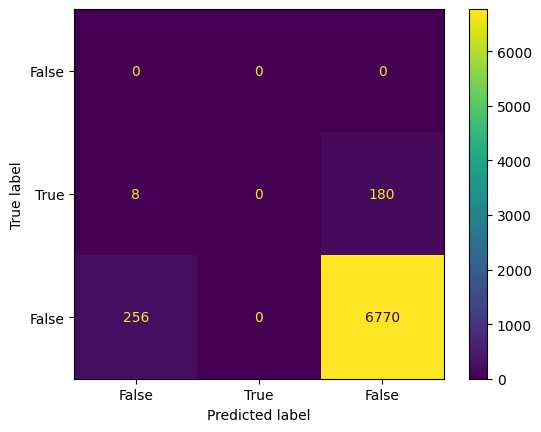

In [70]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True,False])

cm_display.plot()
plt.show()

In [74]:
results = model.predict([[1,1,5,5,1,1,1,0]])
results

C:\Users\user 2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


array([1], dtype=int64)